# 1. Titanic: Machine Learning from Disaster

In [1]:
import pandas as pd
import numpy as np

data_train = pd.read_csv("train.csv")
print(data_train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

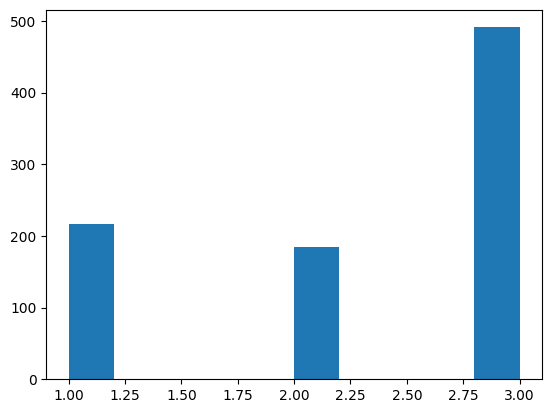

In [2]:
import matplotlib.pyplot as plt

# data_train의 데이터 중 "pclass"에 대해 히스토그램을 그림
plt.hist(data_train["Pclass"]);

In [3]:
# 객실 등급이 생존에 끼친 영향을 살펴봄
# 이를 위해서는 생존 여부에 따라 데이터를 분리
data_train[data_train.Survived==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [4]:
data_survived = data_train[data_train.Survived==1]

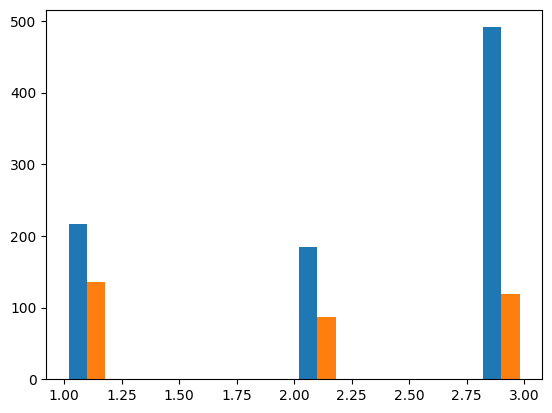

In [5]:
# 전체 데이터와 생존자들의 데이터로 히스토그램을 생성
plt.hist([data_train["Pclass"], data_survived["Pclass"]]);

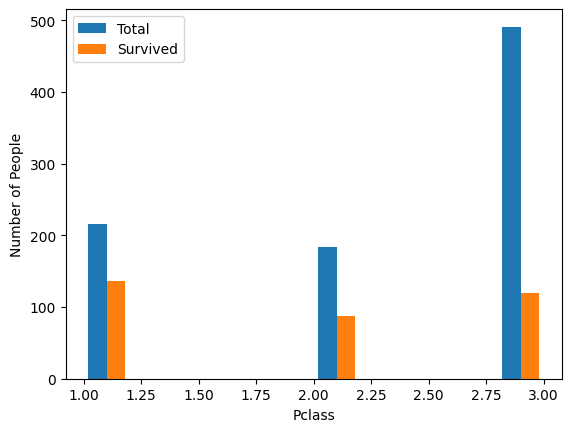

In [6]:
# Survived 항목의 값이 1인 데이터만을 변수 survived에 대입
data_survived = data_train[data_train.Survived == 1]

# data_train과 survived 데이터의 "Pclass"에 대해 히스토그램을 그림
plt.hist([data_train["Pclass"], data_survived["Pclass"]])

plt.xlabel("Pclass")
plt.ylabel("Number of People")
plt.legend(["Total", "Survived"]);

In [7]:
# 생존자 중 남성만 찾음
(data_train.Survived==1) & (data_train.Sex=="male")

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889     True
890    False
Length: 891, dtype: bool

In [8]:
# 생존자 중 여성만 찾음
(data_train.Survived==1) & (data_train.Sex=="female")

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889    False
890    False
Length: 891, dtype: bool

In [9]:
# 해당 데이터만 따로 할당
survived_m = (data_train.Survived==1) & (data_train.Sex=="male")
survived_f = (data_train.Survived==1) & (data_train.Sex=="female")

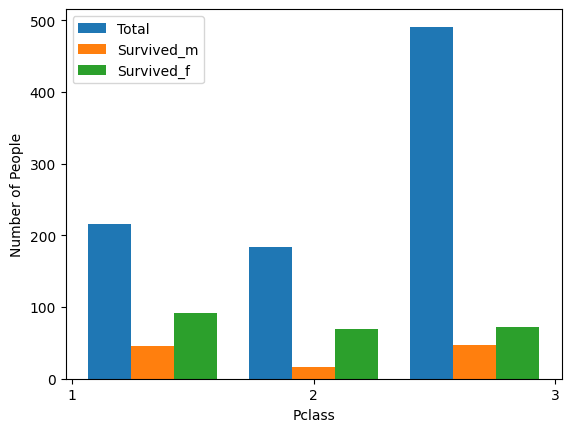

In [10]:
# 생존 그룹의 데이터 중 성별이 남성인 데이터만을 변수 survived에 대입
survived_m = data_train[(data_train.Survived==1) & (data_train.Sex=="male")]

# 생존 그룹의 데이터 중 성별이 여자인 데이터만을 변수 survived에 대입
survived_f = data_train[(data_train.Survived==1) & (data_train.Sex=="female")]

# 히스토그램 계산하여 표시. 구간 갯수는 3으로 조정
plt.hist([data_train["Pclass"], survived_m["Pclass"], survived_f["Pclass"]], bins=3)

plt.xlabel("Pclass")
plt.ylabel("Number of People")
plt.xticks([1, 2, 3])
plt.legend(["Total", "Survived_m", "Survived_f"]);

In [11]:
# 테스트 데이터를 읽어 변수에 저장
data_test = pd.read_csv("test.csv")

In [12]:
# csv 파일을 만들기 전에 데이터를 저장해 둘 변수(answer)를 만듦
# numpy 라이브러리의 zeros 함수는 값이 0으로 초기화 된 2차원 배열을 만듦
# 제출할 파일의 첫 번째 열은 승객 번호를 넣도록 지정되어 있으므로, 변수 answer의 첫 번째 열에는 test 데이터의 PassengerID를 가져와 대입
answer = np.zeros((len(data_test), 2))
answer[:, 0] = data_test["PassengerId"]

- 생존 여부는 다음과 같은 규칙으로 예측
- 이때 변수 answer는 이미 0으로 모두 초기화하였으므로, 1(생존)로 바꾸는 경우만 지정
1) 1등석 승객은 생존
2) 2등석 승객 중 여성은 생존

In [13]:
# 1등석 승객에 대한 답은 1(생존)로 설정
answer[(data_test.Pclass==1), 1] = 1

# 2등석 승객이면서 여성인 경우 1(생존)로 설정
answer[(data_test.Pclass==2) & (data_test.Sex=="female"), 1] = 1

- 결과 데이터는 만들었으나, numpy의 배열에서 csv파일로 바로 저장할 수 없음
- 이 때문에 csv로의 저장을 위해 pandas 라이브러리의 DataFrame 형식으로 변환하여 저장
- 각 열의 제목은 각각 'PassengerId', 'Survived'로 하고, 소수점이 있는 실수형으로 되어있는 배열의 값들을 정수형으로 바꿔줌
- csv 파일에 실수형, 즉 1.0 or 3.0 같은 형식으로도 저장할 수도 있으나, Kaggle에서 타이타닉 데이터의 결과는 int형으로 제출하도록 되어있기 때문에, 실수형으로 저장하는 경구 결과 제출 시에 문제가 생김

In [14]:
# 배열 answer를 DataFrame 형식으로 변환하고, df_frame 변수에 저장
df_answer = pd.DataFrame(answer)
# 각 열의 제목을 지정
df_answer.columns = ["PassengerId", "Survived"]
# 데이터를 정수형으로 변환
df_answer = df_answer.astype("int32")
# 결과를 csv 파일로 저장 (index는 제외)
df_answer.to_csv("test_predict.csv", index = False)

- 캐글에 결과를 제출하는 코드는 다음과 같음
- 코드가 길어 두 줄로 나뉘어졌으나, 한 줄에 모두 작성하는 코드의 예시
- ex) kaggle competitions submit -c titanic -f submission.csv -m "Message"
- -c 다음에는 대회의 이름을, -f 다음에는 제출할 csv 파일 이름을, -m 다음에는 제출하는 정답에 대한 간단한 설명을 넣으면 됨
- 전체 코드는 다음과 같고, 제출이 완료되면, 캐글 홈페이지에서 정확도를 확인할 수 있음

In [15]:
# 테스트 파일을 읽음
data_test = pd.read_csv("test.csv")

# 결과를 저장할 배열(len * 2)을 만들고, 배열의 값은 모두 0으로 지정
answer = np.zeros((len(data_test), 2))

# answer의 첫 번째 열(column)에는 passenger ID를 넣음
answer[:, 0] = data_test["PassengerId"]

# 1등석 승객에 대한 답은 1(생존)로 설정
answer[(data_test.Pclass==1), 1] = 1

# 2등석 승객이면서 여성인 경우 1(생존)로 설정
answer[(data_test.Pclass==2) & (data_test.Sex=="female"), 1] = 1

# DataFrame 형식으로 변환하고, df_frame 변수에 저장
df_answer = pd.DataFrame(answer)
# 각 열의 제목을 지정
df_answer.columns = ["PassengerId", "Survived"]
# 데이터를 정수형으로 변환
df_answer = df_answer.astype("int32")

# 결과를 csv 파일로 저장 (index는 제외)
df_answer.to_csv("test_predict.csv", index = False)
# Kaggle에 csv파일을 제출
kaggle competitions submit -c titanic -f submission.csv -m "Message"